In [1]:
import numpy as np
import matplotlib.pyplot as plt

def graphing(model):
    acc = model.history['acc']
    val_acc = model.history['val_acc']
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
def avg_stats(model):
    acc = model.history['acc']
    val_acc = model.history['val_acc']
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    
    print('AVG acc: ', np.mean(acc))
    print('AVG val_acc: ', np.mean(val_acc))
    print('AVG loss: ', np.mean(loss))
    print('AVG val_loss: ', np.mean(val_loss))

In [2]:
import os, shutil
import keras
from keras import optimizers
from keras import layers
from keras import models
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [13]:
original_dataset_dir = '../input/resize-photos/resize-photos'
os.listdir(original_dataset_dir)

['bardak (92).jpg',
 'bardak (25).jpg',
 'kalem (96).jpg',
 'kalem (98).jpg',
 'kalem (38).jpg',
 'bardak (77).jpg',
 'kalem (9).jpg',
 'kalem (70).jpg',
 'bardak (39).jpg',
 'kalem (86).jpg',
 'kalem (13).jpg',
 'kalem (54).jpg',
 'kalem (16).jpg',
 'kalem (80).jpg',
 'kalem (85).jpg',
 'bardak (51).jpg',
 'bardak (93).jpg',
 'kalem (11).jpg',
 'kalem (39).jpg',
 'bardak (50).jpg',
 'kalem (45).jpg',
 'kalem (44).jpg',
 'bardak (67).jpg',
 'kalem (76).jpg',
 'bardak (56).jpg',
 'kalem (14).jpg',
 'bardak (7).jpg',
 'kalem (68).jpg',
 'kalem (1).jpg',
 'kalem (83).jpg',
 'bardak (78).jpg',
 'bardak (49).jpg',
 'bardak (32).jpg',
 'bardak (69).jpg',
 'bardak (11).jpg',
 'bardak (81).jpg',
 'bardak (89).jpg',
 'kalem (91).jpg',
 'bardak (16).jpg',
 'bardak (20).jpg',
 'bardak (58).jpg',
 'kalem (53).jpg',
 'bardak (76).jpg',
 'bardak (82).jpg',
 'kalem (18).jpg',
 'bardak (27).jpg',
 'bardak (62).jpg',
 'bardak (45).jpg',
 'bardak (12).jpg',
 'bardak (88).jpg',
 'kalem (63).jpg',
 'barda

In [14]:
base_dir = '../workspace'
os.mkdir(base_dir)

In [15]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Train klasörü içine kalemler klasörü açılıyor
train_kalem_dir = os.path.join(train_dir, 'kalem')
os.mkdir(train_kalem_dir)

# Train klasörü içine telefonlar klasörü açılıyor
train_bardak_dir = os.path.join(train_dir, 'bardak')
os.mkdir(train_bardak_dir)

# Validation klasörü içine kalemler klasörü açılıyor
validation_kalem_dir = os.path.join(validation_dir, 'kalem')
os.mkdir(validation_kalem_dir)

# Validation klasörü içine telefonlar klasörü açılıyor
validation_bardak_dir = os.path.join(validation_dir, 'bardak')
os.mkdir(validation_bardak_dir)

# Test klasörü içine kalemler klasörü açılıyor
test_kalem_dir = os.path.join(test_dir, 'kalem')
os.mkdir(test_kalem_dir)

# Test klasörü içine telefonlar klasörü açılıyor
test_bardak_dir = os.path.join(test_dir, 'bardak')
os.mkdir(test_bardak_dir)

In [16]:
#Kalem fotoğraflarının kopyalanması
fnames = ['kalem ({}).jpg'.format(i) for i in range(60)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #Kaynaktan dosyayı seç
    dst = os.path.join(train_kalem_dir, fname) #Hedef konum seç
    shutil.copyfile(src, dst) #Kopyala

fnames = ['kalem ({}).jpg'.format(i) for i in range(60, 80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_kalem_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['kalem ({}).jpg'.format(i) for i in range(80, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_kalem_dir, fname)
    shutil.copyfile(src, dst)
    
#Bardak fotoğraflarının kopyalanması   
fnames = ['bardak ({}).jpg'.format(i) for i in range(60)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #Kaynaktan dosyayı seç
    dst = os.path.join(train_bardak_dir, fname) #Hedef konum seç
    shutil.copyfile(src, dst) #Kopyala

fnames = ['bardak ({}).jpg'.format(i) for i in range(60, 80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bardak_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['bardak ({}).jpg'.format(i) for i in range(80, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bardak_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
print('Train: kalem fotoğrafı:', len(os.listdir(train_kalem_dir)))
print('Train: bardak fotoğrafı:', len(os.listdir(train_bardak_dir)))
print('Validation: kalem fotoğrafı:', len(os.listdir(validation_kalem_dir)))
print('Validation: bardak fotoğrafı:', len(os.listdir(validation_bardak_dir)))
print('Test: kalem fotoğrafı:', len(os.listdir(test_kalem_dir)))
print('Test: bardak fotoğrafı:', len(os.listdir(test_bardak_dir)))

Train: kalem fotoğrafı: 60
Train: bardak fotoğrafı: 60
Validation: kalem fotoğrafı: 20
Validation: bardak fotoğrafı: 20
Test: kalem fotoğrafı: 20
Test: bardak fotoğrafı: 20


In [18]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


<h1> MODELLER </h1>

<h2>MODEL_1</h2>  <hr>
    **Conv2D :** 32 / 16 / 8 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 16<br>
    **Dropout :** 0 <hr>
    **steps_per_epoch :** 30<br>
    **epochs :** 30<hr>

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
30/30 [==============================] - 7s 220ms/step - loss: 0.6609 - acc: 0.6417 - val_loss: 0.5553 - val_acc: 0.8750
Epoch 2/30
30/30 [==============================] - 1s 43ms/step - loss: 0.5524 - acc: 0.7700 - val_loss: 0.5006 - val_acc: 0.6500
Epoch 3/30
30/30 [==============================] - 1s 42ms/step - loss: 0.4425 - acc: 0.8733 - val_loss: 0.3919 - val_acc: 0.7500
Epoch 4/30
30/30 [==============================] - 1s 42ms/step - loss: 0.3448 - acc: 0.8967 - val_loss: 0.2868 - val_acc: 0.9750
Epoch 5/30
30/30 [==============================] - 1s 42ms/step - loss: 0.2449 - acc: 0.9550 - val_loss: 0.1689 - val_acc: 1.0000
Epoch 6/30
30/30 [==============================] - 1s 43ms/step - loss: 0.1996 - acc: 0.9450 - val_loss: 0.1156 - val_acc: 0.9750
Epoch 7/30
30/30 [==============================] - 1s 43ms/step - loss: 0.1779 - acc: 0.9400 - val_loss: 0.2924 - val_acc: 0.8250
Epoch 8/30
30/30 [================

In [22]:
avg_stats(history)

AVG acc:  0.9481111069851451
AVG val_acc:  0.9008333296179771
AVG loss:  0.143584263692998
AVG val_loss:  0.24729532338616753


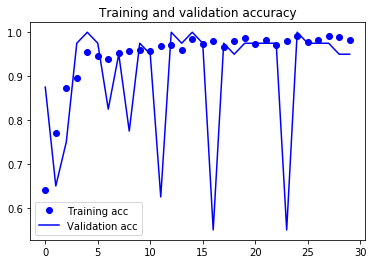

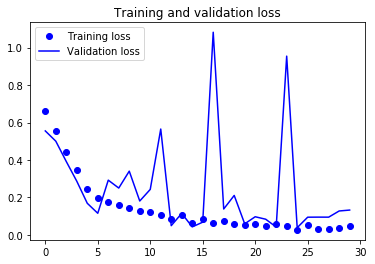

In [23]:
graphing(history)

<h2>MODEL_2</h2>  <hr>
    **Conv2D :** 32 / 16 / 8 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 16<br>
    **Dropout :** 0 <hr>
    <span style="color:red">~~*steps_per_epoch : 30*~~ </span><br>
    **steps_per_epoch :** <span style="color:orange">**train_generator.n / train_generator.batch_size**</span><br>
    **epochs :** 30<hr>

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
history = model.fit_generator(
      train_generator,
      train_generator.n/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
6/6 [==============================] - 1s 179ms/step - loss: 0.7092 - acc: 0.4833 - val_loss: 0.6759 - val_acc: 0.5240
Epoch 2/30
6/6 [==============================] - 1s 130ms/step - loss: 0.6781 - acc: 0.5667 - val_loss: 0.6673 - val_acc: 0.8730
Epoch 3/30
6/6 [==============================] - 1s 138ms/step - loss: 0.6711 - acc: 0.6750 - val_loss: 0.6493 - val_acc: 0.7000
Epoch 4/30
6/6 [==============================] - 1s 143ms/step - loss: 0.6554 - acc: 0.6583 - val_loss: 0.6505 - val_acc: 0.5030
Epoch 5/30
6/6 [==============================] - 1s 139ms/step - loss: 0.6561 - acc: 0.5833 - val_loss: 0.6260 - val_acc: 0.7980
Epoch 6/30
6/6 [==============================] - 1s 140ms/step - loss: 0.6475 - acc: 0.6250 - val_loss: 0.6150 - val_acc: 0.8520
Epoch 7/30
6/6 [==============================] - 1s 140ms/step - loss: 0.6186 - acc: 0.8000 - val_loss: 0.5931 - val_acc: 0.8000
Epoch 8/30
6/6 [==============================] - 1s 150ms/step - loss: 0.6104 - acc: 0.77

In [26]:
avg_stats(history)

AVG acc:  0.8280555524759822
AVG val_acc:  0.8460999987721444
AVG loss:  0.457629201726781
AVG val_loss:  0.4588884835143884


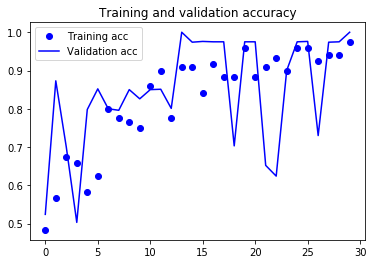

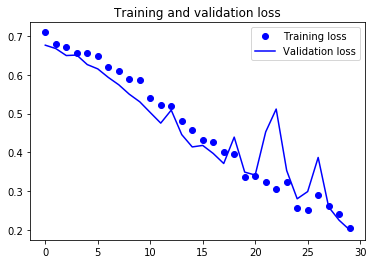

In [27]:
graphing(history)

<h2>MODEL_3</h2>  <hr>
    **Conv2D :** 32 / 16 / 8 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 16<br>
    **Dropout :** 0 <hr>
    <span style="color:red">~~*steps_per_epoch : train_generator.n / train_generator.batch_size*~~ </span><br>
    **steps_per_epoch :** <span style="color:orange">**30** </span><br>
    <span style="color:red">~~*epochs : 30*~~ </span><br>
    **epochs :** <span style="color:orange">**50** </span><br><hr>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
avg_stats(history)

In [ ]:
graphing(history)

<h2>MODEL_4</h2>  <hr>
    **Conv2D :** 32 / 16 / 8 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 16<br>
    **Dropout :** 0<br>
    <span style="color:green">**+ data augmentation**</span><hr>
    **steps_per_epoch :** 30<br>
    **epochs :** 50<hr>

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_bardak_dir, fname) for fname in os.listdir(train_bardak_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
avg_stats(history)

In [ ]:
graphing(history)

<h2>MODEL_5</h2>  <hr>
    <span style="color:red">~~*Conv2D : 32 / 16 / 8 (3,3)*~~</span><br>
    **Conv2D :**<span style="color:orange">** 64 / 128 / 64 **</span>(3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    <span style="color:red">~~*Dense: 16*~~</span><br>
    **Dense :**<span style="color:orange">** 256 **</span>(3,3)<br>
    **Dropout:** 0<br>
    **data augmentation**<hr>
    **steps_per_epoch :** 30<br>
    **epochs :** 50<hr>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
avg_stats(history)

In [ ]:
graphing(history)

<h2>MODEL_6</h2>  <hr>
    **Conv2D :** 64 / 128 / 64 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 256<br>
    <span style="color:red">~~*Dropout: 0*~~</span><br>
    **Dropout :** <span style="color:orange">**0.5**</span><br>
    **data augmentation**<hr>
    **steps_per_epoch :** 30<br>
    **epochs :** 50<hr>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
avg_stats(history)

In [ ]:
graphing(history)

<h2>MODEL_7</h2>  <hr>
    **Conv2D :** 64 / 128 / 64 (3,3)<br>
    **MaxPooling :** 2X (2,2)<br>
    **Dense :** 256<br>
    **Dropout :** 0.5<br>
    **data augmentation**<br>
    <span style="color:red">~~*steps_per_epoch : 100*~~</span><br>
    **steps_per_epoch :**<span style="color:orange">**100**</span><br>
    <span style="color:green">**+ weight regularization**</span><br>
    **epochs :** 50<hr>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.12(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
avg_stats(history)

In [ ]:
graphing(history)